# Задание
* Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
* Извлеките все описания этих вакансий
* Создайте аналогичный vacancy DataFrame только добавьте поле skills
* Переведите даты публикаций в datetime
* Постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите те вакансии с использованием python, которые вам интересны
* Определите по полю skills какие навыки больше всего востребованы для этих вакансий
* Постройте график наиболее востребованных навыков для аналитика

https://github.com/hhru/api

In [1]:
import time

import requests
from tqdm.auto import tqdm
import pandas as pd

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [3]:
res = requests.get(url)

In [4]:
res.status_code

200

In [5]:
from pandas.io.json import json_normalize

vacancies = res.json()
df = json_normalize(vacancies['items'])
df

C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\2148342442.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = json_normalize(vacancies['items'])


,id,premium,name,has_test,response_letter_required,salary,address,response_url,sort_point_distance,published_at,...,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,salary.from,salary.to,salary.currency,salary.gross,address.metro
0,66068432,False,Frontend-разработчик,False,False,NaN,NaN,None,None,2022-06-20T09:12:28+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66640661,False,IOS разработчик (Продукт Залоговая экспертиза),False,False,NaN,NaN,None,None,2022-06-06T18:26:38+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67409350,False,Секретарь,False,False,NaN,NaN,None,None,2022-07-01T14:52:53+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54923506,False,DevOps,False,False,NaN,NaN,None,None,2022-06-18T15:21:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55509810,False,SRE / Администратор IT систем (SberDevices),False,False,NaN,NaN,None,None,2022-06-14T09:20:08+0300,...,4,55.740544,37.534100,"[{'station_name': 'Кутузовская', 'line_name': ...",731097,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,66629555,False,Java-разработчик (SberWorks),False,False,NaN,NaN,None,None,2022-06-06T14:14:48+0300,...,9,55.709610,37.622569,"[{'station_name': 'Тульская', 'line_name': 'Се...",146841,NaN,NaN,NaN,NaN,NaN
96,55375331,False,Project manager,False,False,NaN,NaN,None,None,2022-06-08T11:12:44+0300,...,NaN,NaN,NaN,[],2894827,NaN,NaN,NaN,NaN,NaN
97,67473425,False,Data-инженер (проект SberID),False,False,NaN,NaN,None,None,2022-07-04T18:50:58+0300,...,NaN,NaN,NaN,NaN,NaN,250000.0,350000.0,RUR,True,NaN
98,66081914,False,Product Owner,False,False,NaN,NaN,None,None,2022-06-20T09:12:30+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
num_pages = vacancies.get('pages')
num_pages

12

In [7]:
for i in range(num_pages):
    print(page)
    print(df.shape)
    page += 1
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    if res.status_code != 200:
        break
    vacancies = res.json()
    # df = json_normalize(vacancies['items'])
    df = df.append(json_normalize(vacancies['items']))
    time.sleep(30)

1
(100, 63)


C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = df.append(json_normalize(vacancies['items']))
C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_normalize(vacancies['items']))


2
(200, 63)


C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = df.append(json_normalize(vacancies['items']))
C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_normalize(vacancies['items']))


3
(300, 63)


C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = df.append(json_normalize(vacancies['items']))
C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_normalize(vacancies['items']))


4
(400, 63)


C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = df.append(json_normalize(vacancies['items']))
C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_normalize(vacancies['items']))


5
(500, 63)


C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = df.append(json_normalize(vacancies['items']))
C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_normalize(vacancies['items']))


6
(600, 63)


C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = df.append(json_normalize(vacancies['items']))
C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_normalize(vacancies['items']))


7
(700, 63)


C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = df.append(json_normalize(vacancies['items']))
C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_normalize(vacancies['items']))


8
(800, 63)


C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = df.append(json_normalize(vacancies['items']))
C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_normalize(vacancies['items']))


9
(900, 63)


C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = df.append(json_normalize(vacancies['items']))
C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_normalize(vacancies['items']))


10
(1000, 63)


C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = df.append(json_normalize(vacancies['items']))
C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_normalize(vacancies['items']))


11
(1040, 64)


C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = df.append(json_normalize(vacancies['items']))
C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_normalize(vacancies['items']))


12
(1040, 64)


C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = df.append(json_normalize(vacancies['items']))
C:\Users\Nikita\AppData\Local\Temp\ipykernel_35232\4293281765.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_normalize(vacancies['items']))


In [8]:
df

,id,premium,name,has_test,response_letter_required,salary,address,response_url,sort_point_distance,published_at,...,address.metro.lat,address.metro.lng,address.metro_stations,address.id,salary.from,salary.to,salary.currency,salary.gross,address.metro,immediate_redirect_url
0,66068432,False,Frontend-разработчик,False,False,NaN,NaN,None,None,2022-06-20T09:12:28+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66640661,False,IOS разработчик (Продукт Залоговая экспертиза),False,False,NaN,NaN,None,None,2022-06-06T18:26:38+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67409350,False,Секретарь,False,False,NaN,NaN,None,None,2022-07-01T14:52:53+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54923506,False,DevOps,False,False,NaN,NaN,None,None,2022-06-18T15:21:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55509810,False,SRE / Администратор IT систем (SberDevices),False,False,NaN,NaN,None,None,2022-06-14T09:20:08+0300,...,55.740544,37.5341,"[{'station_name': 'Кутузовская', 'line_name': ...",731097,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,66519567,False,Эксперт сопровождения Hadoop,False,False,NaN,NaN,None,None,2022-06-26T17:34:26+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,66640733,False,Senior разработчик ПО на Golang (SberInfra),False,False,NaN,NaN,None,None,2022-07-04T09:21:34+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,67399016,True,Менеджер по работе с ключевыми клиентами малог...,False,False,NaN,NaN,https://hh.ru/vacancy/45790891,None,2022-07-04T09:05:17+0300,...,NaN,NaN,NaN,NaN,119300.0,NaN,RUR,True,NaN,https://hh.ru/vacancy/45790891
38,67399519,True,Старший менеджер по привлечению корпоративных ...,False,False,NaN,NaN,https://hh.ru/vacancy/45381514,None,2022-07-04T09:05:16+0300,...,NaN,NaN,NaN,NaN,146400.0,NaN,RUR,True,NaN,https://hh.ru/vacancy/45381514


In [9]:
df = df.reset_index()
# df = pd.read_csv('data.xls')
# сохраняю чтобы не перезапрашивать каждый раз
df.to_csv('data.xls')

# Добавляем skills

In [10]:
all_vacancy_ids = df['id']
all_vacancy_ids.shape

(1040,)

In [11]:
list = []
for id in all_vacancy_ids:
    url = f'https://api.hh.ru/vacancies/{id}'
    res = requests.get(url)
    # print(res.json().get('key_skills'))
    list.append(res.json().get('key_skills'))

In [12]:
res

<Response [200]>

In [13]:
list

[[],
 [],
 [],
 [],
 [{'name': 'Linux'},
  {'name': 'Bash'},
  {'name': 'Ansible'},
  {'name': 'Python'},
  {'name': 'DevOps'}],
 [{'name': 'Oracle Pl/SQL'},
  {'name': 'SQL'},
  {'name': 'Работа с большим объемом информации'},
  {'name': 'Управление временем'},
  {'name': 'Сбор и анализ информации'}],
 [{'name': 'SQL'},
  {'name': 'Python'},
  {'name': 'Оперативный поиск информации в сети Интернет'},
  {'name': 'Qlik Sense'},
  {'name': 'Статистический анализ'}],
 [{'name': 'Управление проектами'},
  {'name': 'Руководство коллективом'},
  {'name': 'Java'},
  {'name': 'Hibernate ORM'},
  {'name': 'OpenShift'}],
 [],
 [],
 [],
 [{'name': 'Figma'},
  {'name': 'Работа в команде'},
  {'name': 'UX'},
  {'name': 'Adobe Photoshop'},
  {'name': 'UI'}],
 [{'name': 'Автоматизация процессов'},
  {'name': 'Оценка должностей'},
  {'name': 'Excel'},
  {'name': 'Power Point'},
  {'name': 'Грейдинг'},
  {'name': 'Участие в обзорах заработных плат'}],
 [{'name': 'Проведение презентаций'},
  {'name': 'П

In [14]:
df_skills = df.copy()

In [15]:
import numpy as np
df['skills'] = list

# Переведите даты публикаций в datetime

In [16]:
df.head()

,index,id,premium,name,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.lng,address.metro_stations,address.id,salary.from,salary.to,salary.currency,salary.gross,address.metro,immediate_redirect_url,skills
0,0,66068432,False,Frontend-разработчик,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,1,66640661,False,IOS разработчик (Продукт Залоговая экспертиза),False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,67409350,False,Секретарь,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,3,54923506,False,DevOps,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,4,55509810,False,SRE / Администратор IT систем (SberDevices),False,False,NaN,NaN,None,None,...,37.5341,"[{'station_name': 'Кутузовская', 'line_name': ...",731097,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Linux'}, {'name': 'Bash'}, {'name':..."


In [17]:
df['published_at'] = pd.to_datetime(df['published_at'], format='%Y-%m-%dT')
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%dT')

In [18]:
df

,index,id,premium,name,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.lng,address.metro_stations,address.id,salary.from,salary.to,salary.currency,salary.gross,address.metro,immediate_redirect_url,skills
0,0,66068432,False,Frontend-разработчик,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,1,66640661,False,IOS разработчик (Продукт Залоговая экспертиза),False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,67409350,False,Секретарь,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,3,54923506,False,DevOps,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,4,55509810,False,SRE / Администратор IT систем (SberDevices),False,False,NaN,NaN,None,None,...,37.5341,"[{'station_name': 'Кутузовская', 'line_name': ...",731097,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Linux'}, {'name': 'Bash'}, {'name':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,35,66519567,False,Эксперт сопровождения Hadoop,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1036,36,66640733,False,Senior разработчик ПО на Golang (SberInfra),False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1037,37,67399016,True,Менеджер по работе с ключевыми клиентами малог...,False,False,NaN,NaN,https://hh.ru/vacancy/45790891,None,...,NaN,NaN,NaN,119300.0,NaN,RUR,True,NaN,https://hh.ru/vacancy/45790891,"[{'name': 'Прямые продажи'}, {'name': 'Финансо..."
1038,38,67399519,True,Старший менеджер по привлечению корпоративных ...,False,False,NaN,NaN,https://hh.ru/vacancy/45381514,None,...,NaN,NaN,NaN,146400.0,NaN,RUR,True,NaN,https://hh.ru/vacancy/45381514,"[{'name': 'Холодные продажи'}, {'name': 'Поиск..."


In [19]:
df.dtypes

index                       int64
id                         object
premium                      bool
name                       object
has_test                     bool
                           ...   
salary.currency            object
salary.gross               object
address.metro             float64
immediate_redirect_url     object
skills                     object
Length: 66, dtype: object

# Постройте график опубликованных вакансий по датам

In [20]:
list = []
for value in df['published_at']:
    list.append(value.date())

In [21]:
df['date'] = list

<AxesSubplot:xlabel='date', ylabel='count'>

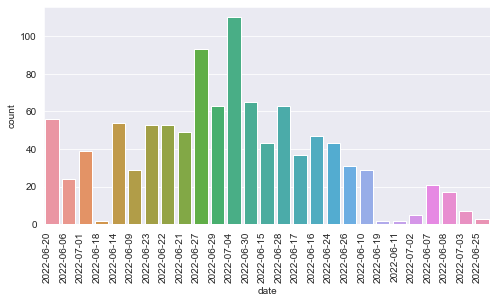

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,4))
ax = sns.countplot(x="date", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sns.countplot(x='date', data = df)

# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [23]:
list = []
for value in df['date']:
    list.append(value.weekday())
list

[0,
 0,
 4,
 5,
 1,
 3,
 3,
 3,
 3,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 3,
 0,
 0,
 2,
 3,
 1,
 2,
 0,
 4,
 1,
 3,
 4,
 6,
 3,
 0,
 3,
 3,
 3,
 2,
 0,
 4,
 3,
 4,
 6,
 2,
 3,
 3,
 2,
 0,
 2,
 1,
 4,
 0,
 1,
 5,
 4,
 4,
 3,
 3,
 1,
 1,
 0,
 1,
 1,
 4,
 1,
 4,
 6,
 3,
 0,
 1,
 4,
 2,
 2,
 2,
 0,
 3,
 2,
 3,
 5,
 3,
 1,
 1,
 2,
 0,
 4,
 3,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 4,
 1,
 0,
 3,
 0,
 2,
 0,
 0,
 3,
 1,
 0,
 3,
 0,
 6,
 4,
 1,
 3,
 0,
 0,
 0,
 3,
 4,
 3,
 2,
 3,
 0,
 0,
 0,
 0,
 1,
 3,
 2,
 2,
 4,
 2,
 1,
 0,
 1,
 4,
 1,
 3,
 2,
 1,
 1,
 4,
 1,
 4,
 2,
 3,
 0,
 4,
 4,
 3,
 0,
 1,
 3,
 0,
 3,
 3,
 4,
 0,
 3,
 0,
 3,
 1,
 4,
 3,
 4,
 1,
 1,
 1,
 3,
 0,
 4,
 0,
 0,
 3,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 1,
 0,
 3,
 1,
 4,
 0,
 0,
 2,
 3,
 4,
 3,
 2,
 4,
 0,
 2,
 3,
 3,
 1,
 4,
 4,
 2,
 3,
 1,
 2,
 4,
 0,
 4,
 1,
 0,
 1,
 4,
 4,
 0,
 0,
 1,
 0,
 6,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 3,
 0,
 1,
 2,
 1,
 3,
 4,
 2,
 1,
 4,
 1,
 1,
 3,
 0,
 6,
 3,
 1,
 3,
 4,
 0,
 1,
 3,
 1,
 2,
 4,
 0,
 1,


In [24]:
df['weekday'] = list

In [25]:
df.groupby('weekday').date.count()

weekday
0    283
1    187
2    176
3    194
4    148
5     12
6     40
Name: date, dtype: int64

## Ответ: В понедельник

# Найдите те вакансии с использованием python, которые вам интересны

In [26]:
SET = set()
for name in df['name']:
    print(name)
    q = name.replace('(','').replace(')','').replace('"','').replace('-','').replace('/','')
    names = q.split(" ")
    for word in names:
        SET.add(word)
        # SET.add(word.lower())
# SET

Frontend-разработчик
IOS разработчик (Продукт Залоговая экспертиза)
Секретарь
DevOps
SRE / Администратор IT систем (SberDevices)
Junior FullStack Developer
Дата аналитик
Технический руководитель
Инженер по сопровождению прикладных систем / Junior Devops
Финансовый советник
Frontend разработчик
UX\UI designer
Специалист C&B
Клиентский менеджер прямых продаж
.NET Developer
IOS разработчик (СберМедицина)
Product Owner
Frontend разработчик (React/TypeScript) (SberWorks)
Java-разработчик
Java разработчик
Методолог акселерационных программ
Middle Java Developer
Аналитик-координатор
Консультант поддержки SAP ММ
Product Owner направления монетизации Цифровые поверхности Салют (SberDevices)
Java-разработчик
Руководитель команды качества данных
Руководитель направления / Главный экономист
Data Analyst (Рекомендательная система)
С++ разработчик
ИТ-консультант/Эксперт/Руководитель направления по развитию дочерних организаций Экосистемы Сбера
Java-разработчик СББОЛ
Ведущий разработчик ABAP
Site Rel

In [27]:
df

,index,id,premium,name,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.id,salary.from,salary.to,salary.currency,salary.gross,address.metro,immediate_redirect_url,skills,date,weekday
0,0,66068432,False,Frontend-разработчик,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-06-20,0
1,1,66640661,False,IOS разработчик (Продукт Залоговая экспертиза),False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-06-06,0
2,2,67409350,False,Секретарь,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-07-01,4
3,3,54923506,False,DevOps,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-06-18,5
4,4,55509810,False,SRE / Администратор IT систем (SberDevices),False,False,NaN,NaN,None,None,...,731097,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Linux'}, {'name': 'Bash'}, {'name':...",2022-06-14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,35,66519567,False,Эксперт сопровождения Hadoop,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-06-26,6
1036,36,66640733,False,Senior разработчик ПО на Golang (SberInfra),False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-07-04,0
1037,37,67399016,True,Менеджер по работе с ключевыми клиентами малог...,False,False,NaN,NaN,https://hh.ru/vacancy/45790891,None,...,NaN,119300.0,NaN,RUR,True,NaN,https://hh.ru/vacancy/45790891,"[{'name': 'Прямые продажи'}, {'name': 'Финансо...",2022-07-04,0
1038,38,67399519,True,Старший менеджер по привлечению корпоративных ...,False,False,NaN,NaN,https://hh.ru/vacancy/45381514,None,...,NaN,146400.0,NaN,RUR,True,NaN,https://hh.ru/vacancy/45381514,"[{'name': 'Холодные продажи'}, {'name': 'Поиск...",2022-07-04,0


In [28]:
list = []
for index, row in df.iterrows():
    name = row['name']
    name = name.lower()
    q = name.__contains__('data') and not name.__contains__('qa') and not name.__contains__('senior') and not name.__contains__('middle')  and not name.__contains__('engineer') and not name.__contains__('lead')  and not name.__contains__('сопровождения')
    list.append(q)

series = pd.Series(list)
actual = df[series]

In [29]:
actual

,index,id,premium,name,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.id,salary.from,salary.to,salary.currency,salary.gross,address.metro,immediate_redirect_url,skills,date,weekday
28,28,55138654,False,Data Analyst (Рекомендательная система),False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",2022-06-24,4
53,53,67406605,False,Data Analyst SberDevices,False,False,NaN,NaN,None,None,...,731097,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",2022-07-01,4
65,65,51784863,False,Data Scientist (SberDevices),False,False,NaN,NaN,None,None,...,823806,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'PyTorch'}, {'name': 'Tensorflow'}, ...",2022-06-23,3
67,67,66815618,False,Data Scientist в Департамент маркетинга,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-06-14,1
97,97,67473425,False,Data-инженер (проект SberID),False,False,NaN,NaN,None,None,...,NaN,250000.0,350000.0,RUR,True,NaN,NaN,[],2022-07-04,0
117,17,66633113,False,Data Analyst,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'SQL'}, {'name': 'Python'}]",2022-06-06,0
120,20,66099561,False,Data аналитик (Рекламная платформа),False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",2022-06-21,1
133,33,66232494,False,Data scientist,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Python'}, {'name': 'Английский язык...",2022-06-14,1
187,87,67399680,False,Валидатор моделей банковской и торговой книг (...,False,False,NaN,NaN,None,None,...,731097,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-07-01,4
196,96,54724476,False,Data Аналитик в команду Блока «Сеть продаж»,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Анализ данных'}, {'name': 'Spark'},...",2022-06-23,3


## actual - вполне неплохо выглядят)

# Определите по полю skills какие навыки больше всего востребованы для этих вакансий

In [30]:
actual = actual.reset_index()

In [32]:
skills = actual['skills']

list = []
for skill in skills:
    for elem in skill:
        list.append(elem['name'])
len(list)

105

In [33]:
L = list
U = set(L)
M = {}
for word in U:
    M[word] = L.count(word)
M

{'hadoop': 1,
 'Java': 4,
 'ETL': 1,
 'Системный анализ': 1,
 'Teradata': 1,
 'Deep Learning': 1,
 'Jenkins': 2,
 'Обучение персонала': 1,
 'Numpy': 1,
 'Работа в команде': 1,
 'PyTorch': 3,
 'качество данных': 1,
 'OpenCV': 1,
 'A/B тесты': 1,
 'SQL': 17,
 'pandas': 1,
 'Data Mining': 1,
 'Bash': 1,
 'Oracle BI': 1,
 'SCALA': 2,
 'Организаторские навыки': 1,
 'Tensorflow': 2,
 'Data Governance': 1,
 'Linux': 3,
 'Ad Hoc Analysis': 1,
 'Hadoop': 6,
 'СУБД': 1,
 'Анализ данных': 3,
 'NLP': 2,
 'Hive': 2,
 'Английский язык': 1,
 'Spark': 6,
 'Atlassian Jira': 4,
 'управление данными': 1,
 'Python': 15,
 'Git': 5,
 'Big Data': 3,
 'PostgreSQL': 3,
 'Управление проектами': 1,
 'ML': 1}

In [34]:
list = []
for key in M:
    list.append((M[key], key))
sorted(list, reverse=True)

[(17, 'SQL'),
 (15, 'Python'),
 (6, 'Spark'),
 (6, 'Hadoop'),
 (5, 'Git'),
 (4, 'Java'),
 (4, 'Atlassian Jira'),
 (3, 'Анализ данных'),
 (3, 'PyTorch'),
 (3, 'PostgreSQL'),
 (3, 'Linux'),
 (3, 'Big Data'),
 (2, 'Tensorflow'),
 (2, 'SCALA'),
 (2, 'NLP'),
 (2, 'Jenkins'),
 (2, 'Hive'),
 (1, 'управление данными'),
 (1, 'качество данных'),
 (1, 'Управление проектами'),
 (1, 'Системный анализ'),
 (1, 'СУБД'),
 (1, 'Работа в команде'),
 (1, 'Организаторские навыки'),
 (1, 'Обучение персонала'),
 (1, 'Английский язык'),
 (1, 'pandas'),
 (1, 'hadoop'),
 (1, 'Teradata'),
 (1, 'Oracle BI'),
 (1, 'OpenCV'),
 (1, 'Numpy'),
 (1, 'ML'),
 (1, 'ETL'),
 (1, 'Deep Learning'),
 (1, 'Data Mining'),
 (1, 'Data Governance'),
 (1, 'Bash'),
 (1, 'Ad Hoc Analysis'),
 (1, 'A/B тесты')]

# Постройте график наиболее востребованных навыков для аналитика

In [36]:
skills = pd.DataFrame(M.items(), columns=['skill', 'count'])

[Text(0, 0, 'hadoop'),
 Text(1, 0, 'Java'),
 Text(2, 0, 'ETL'),
 Text(3, 0, 'Системный анализ'),
 Text(4, 0, 'Teradata'),
 Text(5, 0, 'Deep Learning'),
 Text(6, 0, 'Jenkins'),
 Text(7, 0, 'Обучение персонала'),
 Text(8, 0, 'Numpy'),
 Text(9, 0, 'Работа в команде'),
 Text(10, 0, 'PyTorch'),
 Text(11, 0, 'качество данных'),
 Text(12, 0, 'OpenCV'),
 Text(13, 0, 'A/B тесты'),
 Text(14, 0, 'SQL'),
 Text(15, 0, 'pandas'),
 Text(16, 0, 'Data Mining'),
 Text(17, 0, 'Bash'),
 Text(18, 0, 'Oracle BI'),
 Text(19, 0, 'SCALA'),
 Text(20, 0, 'Организаторские навыки'),
 Text(21, 0, 'Tensorflow'),
 Text(22, 0, 'Data Governance'),
 Text(23, 0, 'Linux'),
 Text(24, 0, 'Ad Hoc Analysis'),
 Text(25, 0, 'Hadoop'),
 Text(26, 0, 'СУБД'),
 Text(27, 0, 'Анализ данных'),
 Text(28, 0, 'NLP'),
 Text(29, 0, 'Hive'),
 Text(30, 0, 'Английский язык'),
 Text(31, 0, 'Spark'),
 Text(32, 0, 'Atlassian Jira'),
 Text(33, 0, 'управление данными'),
 Text(34, 0, 'Python'),
 Text(35, 0, 'Git'),
 Text(36, 0, 'Big Data'),
 Text(3

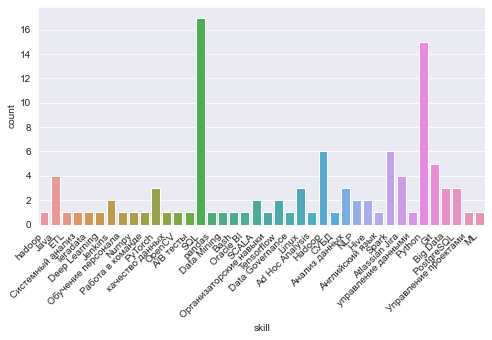

In [38]:
plt.figure(figsize=(8,4))

ax = sns.barplot(data=skills, x='skill', y = 'count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")